# Video Game Sales

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
file = 'vgsales.csv'
df = pd.read_csv(file)

## Publisher With Most Sales

First, I looked at the data to come up with some assumption about video game sales. I began with the global sales to see which publisher has the most influence on the market. I'll be guessing that it's going to be Nintendo since they've been around for longer than I've been alive.

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#First time with this dataset, first I check for missing values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Dropping these missing values will not alter the data analysis too much since there are over 16,000 rows

In [5]:
#Size of the dataframe
df.shape

(16598, 11)

In [6]:
#Dropping missing values
df.dropna(inplace=True)

After having a completely clean dataset, I begin the filtering process.

In [7]:
#I make a copy of the df because I'm going to be filtering.

publisher_vs_sales = df.copy()
publisher_vs_sales = publisher_vs_sales.groupby(by="Publisher").sum()

#Sales are in 100 thousands, snippet of the filtered data:
publisher_vs_sales.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
10TACLE Studios,42192,6020.0,0.07,0.04,0.0,0.00,0.11
1C Company,43237,6031.0,0.01,0.07,0.0,0.02,0.10
20th Century Fox Video Games,27266,9907.0,1.82,0.10,0.0,0.01,1.94
2D Boy,14013,2008.0,0.00,0.03,0.0,0.01,0.04
3DO,289344,72018.0,6.48,3.04,0.0,0.63,10.12


Some of this data got messed up with the groupby() function (Rank, Year) so it is time to remove them.

In [8]:
publisher_vs_sales.drop(columns=['Rank','Year'],axis=1,inplace=True)

In [9]:
#Sort the data to see most sales descending.

publisher_vs_sales.sort_values(by="Global_Sales",ascending=False,inplace=True)

Now I have a data set with the top 10 video game publishers in the world:

In [10]:
top_10 = publisher_vs_sales.head(10)

As you can tell from the data, my assumption of Nintendo being the most influential in the video game market is true. Now I will begin to plot this data:

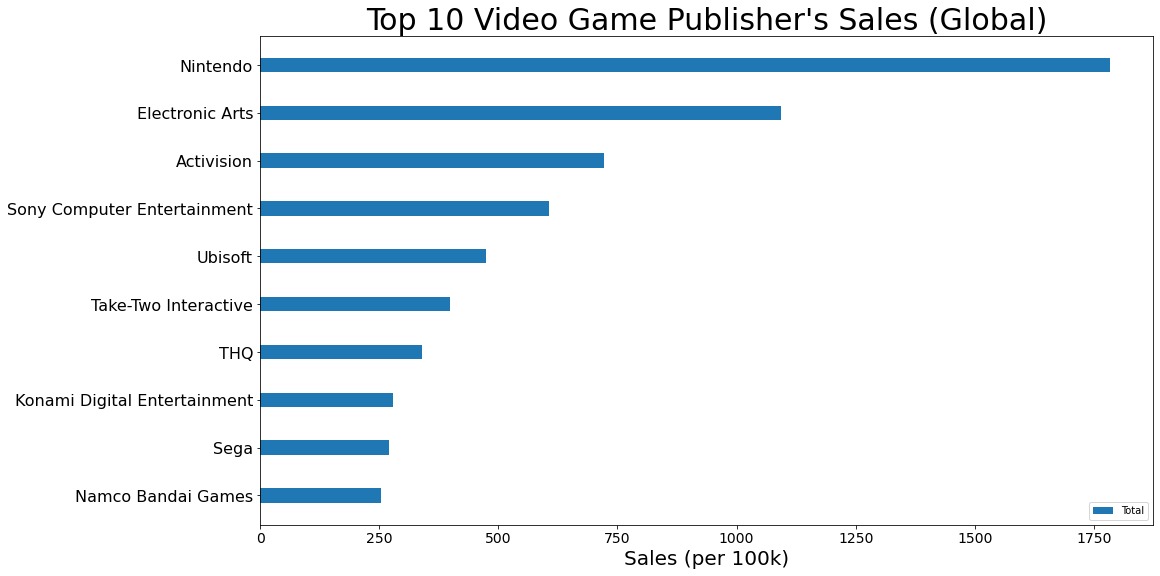

In [11]:
#x-axis
pub = top_10.index[::-1]

#y-axis, in this case sales around the world
total = top_10["Global_Sales"][::-1]

x = np.arange(len(pub)) #location of labels in the x-axis
width = 0.3 #width of bars per publisher (total width of 1 label)

fig, ax = plt.subplots()
fig.set_size_inches(16,9)

ax.barh(x, total, width, label='Total')
plt.yticks(x,pub,fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Sales (per 100k)",fontsize=20);
ax.set_title("Top 10 Video Game Publisher's Sales (Global)", fontsize=30)
ax.legend();

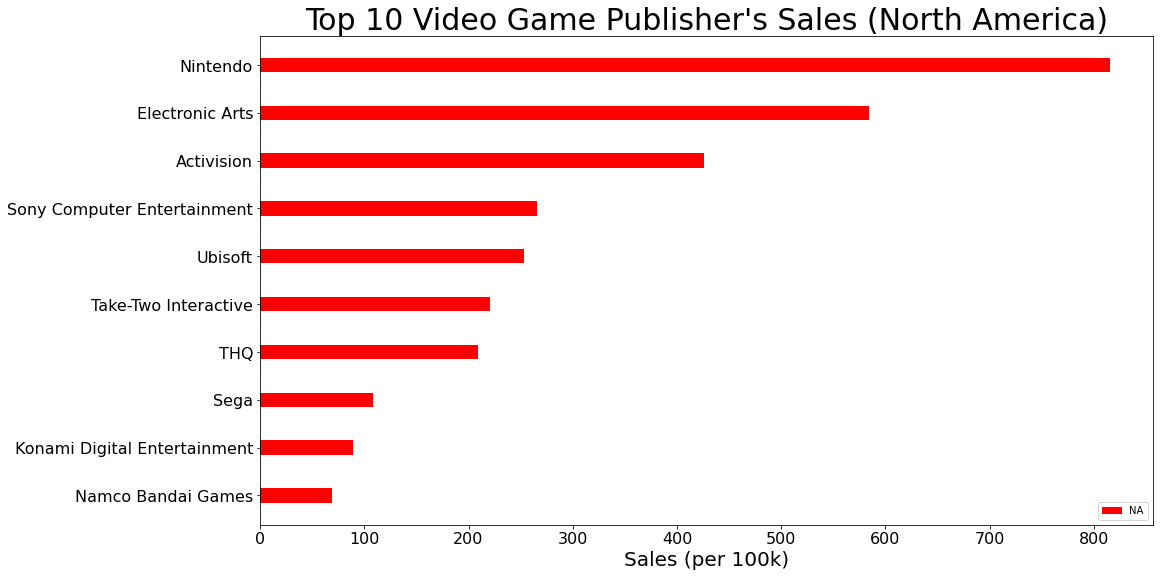

In [12]:
#x-axis
pub2 = top_10['NA_Sales'].sort_values().index

#y-axis, in this case sales in the North American Region
NA = top_10["NA_Sales"].sort_values()

x = np.arange(len(pub)) #location of labels in the x-axis
width = 0.3 #width of bars per publisher (total width of 1 label)

fig, ax = plt.subplots()
fig.set_size_inches(16,9)

ax.barh(x, NA, width, label='NA',color='red')
plt.yticks(x,pub2,fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel("Sales (per 100k)",fontsize=20);
ax.set_title("Top 10 Video Game Publisher's Sales (North America)", fontsize=30)
ax.legend();

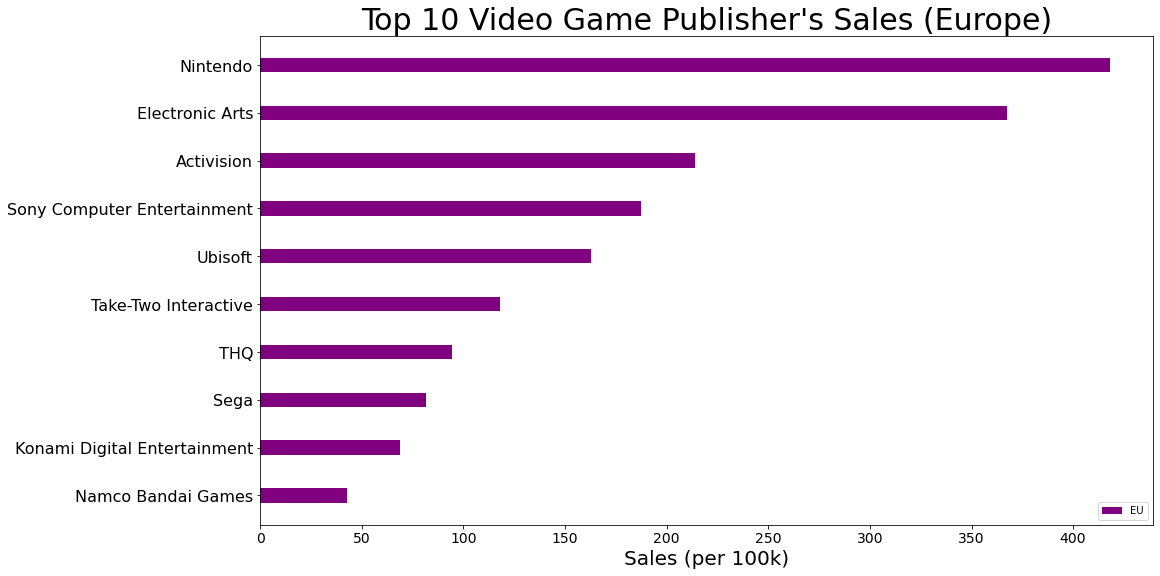

In [13]:
#x-axis
pub3 = top_10['EU_Sales'].sort_values().index

#y-axis, in this case sales in the North American Region
EU = top_10["EU_Sales"].sort_values()

x = np.arange(len(pub)) #location of labels in the x-axis
width = 0.3 #width of bars per publisher (total width of 1 label)

fig, ax = plt.subplots()
fig.set_size_inches(16,9)

ax.barh(x, EU, width, label='EU',color='purple')
plt.yticks(x,pub3,fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Sales (per 100k)",fontsize=20);
ax.set_title("Top 10 Video Game Publisher's Sales (Europe)", fontsize=30)
ax.legend();

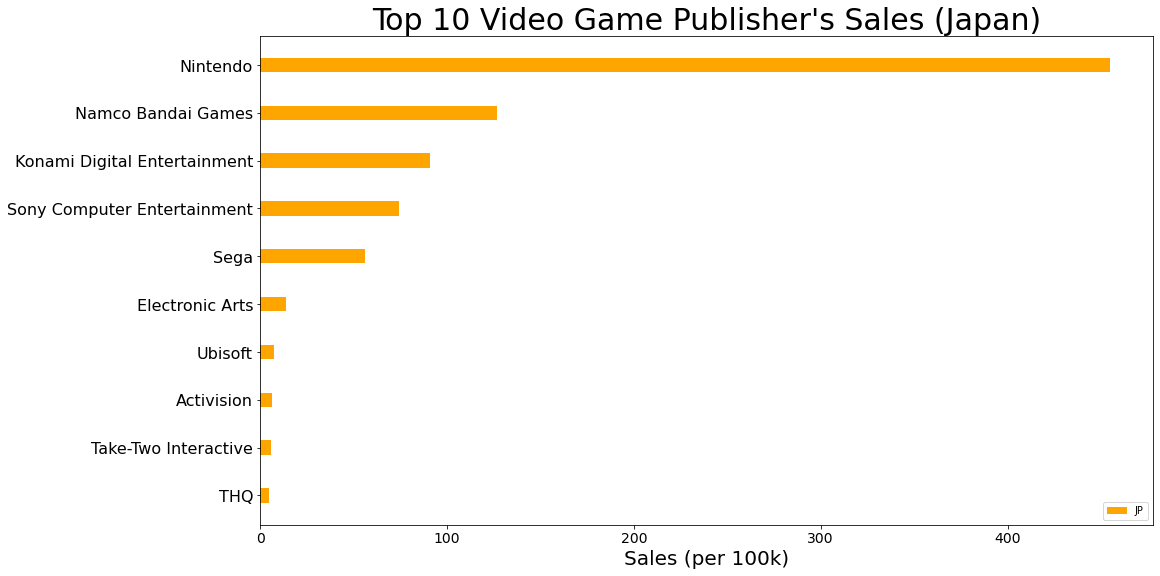

In [14]:
#x-axis
pub4 = top_10['JP_Sales'].sort_values().index

#y-axis, in this case sales in the North American Region
JP = top_10["JP_Sales"].sort_values()

x = np.arange(len(pub)) #location of labels in the x-axis
width = 0.3 #width of bars per publisher (total width of 1 label)

fig, ax = plt.subplots()
fig.set_size_inches(16,9)

ax.barh(x, JP, width, label='JP',color='orange')
plt.yticks(x,pub4,fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Sales (per 100k)",fontsize=20);
ax.set_title("Top 10 Video Game Publisher's Sales (Japan)", fontsize=30)
ax.legend();

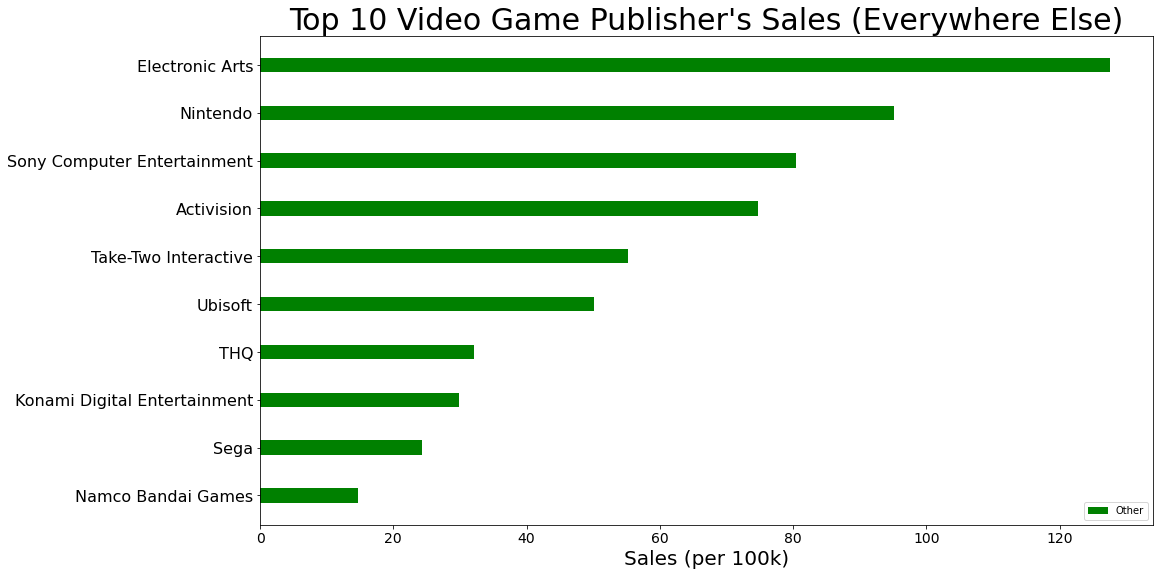

In [15]:
#x-axis
pub5 = top_10['Other_Sales'].sort_values().index

#y-axis, in this case sales in the North American Region
Ot = top_10["Other_Sales"].sort_values()

x = np.arange(len(pub)) #location of labels in the x-axis
width = 0.3 #width of bars per publisher (total width of 1 label)

fig, ax = plt.subplots()
fig.set_size_inches(16,9)

ax.barh(x, Ot, width, label='Other',color='green')
plt.yticks(x,pub5,fontsize=16)
plt.xticks(fontsize=14)
plt.xlabel("Sales (per 100k)",fontsize=20);
ax.set_title("Top 10 Video Game Publisher's Sales (Everywhere Else)", fontsize=30)
ax.legend();

At this point, I started to wonder: "What makes Nintendo and EA games so popular?"

I decided to look into the genre of each game that sold.

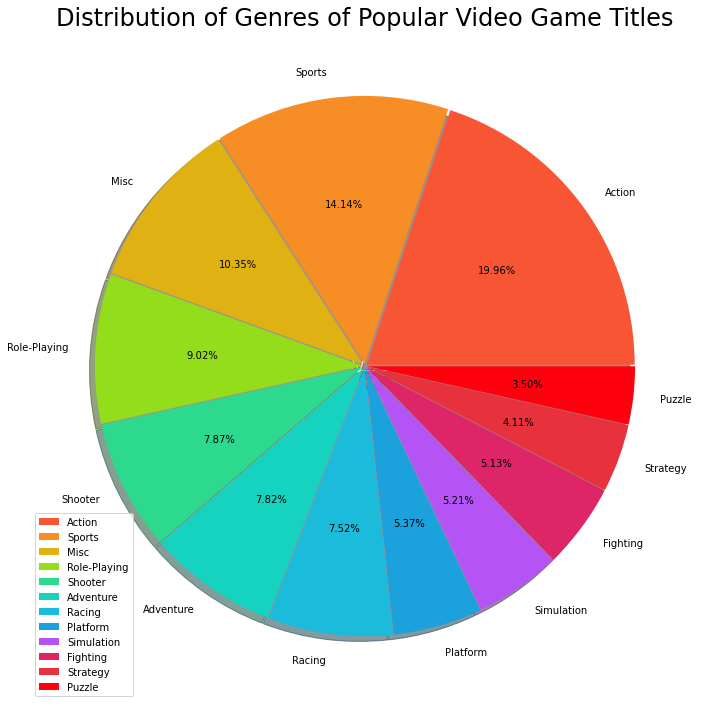

In [16]:
#I grouped the data by Genre to create a pie chart
genre_data = df["Genre"].value_counts(2)
e = np.zeros_like(genre_data)
e +=0.0085
#Plot the data into a pie chart
plt.figure(figsize=(12,14))
plt.pie(genre_data,
        labels=genre_data.index,
        shadow=True,
        explode=e,
        autopct='%.2f%%', 
        colors=['#F75533','#F68D25','#DFB112','#93DD1A','#2CD98D','#16D3BF','#1BBBDB','#1BA1DB','#B554F5','#DE2568','#E7323D',"#FF000F"])
plt.title("Distribution of Genres of Popular Video Game Titles", fontsize=24)
plt.legend(loc='lower left');

I was expecting shooter games to dominate market, but apparently users prefer action and sports games more. I begin to wonder, why are Nintendo games so popular?

### Nintendo

To start, I sort the data by grouping the publishers and genres together.

In [17]:
#New dataframe variable to work with

gnp = df.groupby(by=["Publisher",'Genre']).sum().copy()
gnp.head()

Rank    Year  NA_Sales  EU_Sales  JP_Sales  \
Publisher       Genre                                                       
10TACLE Studios Adventure     15709  2006.0      0.01      0.01       0.0   
                Puzzle        14132  2007.0      0.00      0.03       0.0   
                Strategy      12351  2007.0      0.06      0.00       0.0   
1C Company      Racing        13726  2011.0      0.00      0.03       0.0   
                Role-Playing  16452  2009.0      0.00      0.01       0.0   

                              Other_Sales  Global_Sales  
Publisher       Genre                                    
10TACLE Studios Adventure            0.00          0.02  
                Puzzle               0.00          0.03  
                Strategy             0.00          0.06  
1C Company      Racing               0.01          0.04  
                Role-Playing         0.00          0.01

The Rank and Year columns are pretty useless, so I will drop them.

In [18]:
gnp.drop(columns=["Rank","Year"],axis=1,inplace=True)

In [19]:
#Since I only care about Nintendo at the moment, I'll grab just their sales
nintendo = gnp.loc['Nintendo'].copy()

In [20]:
#Sort the data by Global_Sales
nintendo.sort_values(by='Global_Sales', inplace=True, ascending=False)
nintendo

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Platform,219.46,84.90,102.36,19.43,426.18
Role-Playing,105.63,63.92,101.95,13.03,284.57
Sports,98.77,66.18,35.87,17.18,218.01
Misc,61.98,51.62,55.25,11.78,180.67
Racing,73.55,39.75,29.22,8.81,151.30
Action,63.49,29.02,29.16,6.48,128.10
Puzzle,55.74,26.42,37.09,5.53,124.88
Simulation,29.70,26.05,23.65,5.86,85.25
Shooter,51.39,9.85,6.03,2.39,69.69


Here I learn that platform games are Nintendo's specialy, which makes sense since Super Mario games are mostly platform games. I wanted to visualize this data, so I went ahead and made a bar graph for each column in the nintendo dataframe.

In [21]:
#I decided to make a function since I'm going to be doing the same thing 5 times

def make_bar(data,column,c): #data = dataframe, c = color of the bar graph
    
    data = data.sort_values(by=column,ascending=False)
    y = data[column].values[::-1]
    x = data.index[::-1]
    
    plt.figure(figsize=(12,8))
    plt.style.use("seaborn")
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylabel("Genre",fontsize=20)
    plt.xlabel("Sales (per 100k)",fontsize=20)
    plt.title(f"Nintendo's Genre vs {column}",fontsize=28)
    plt.barh(x,y,color=c);
    return
    

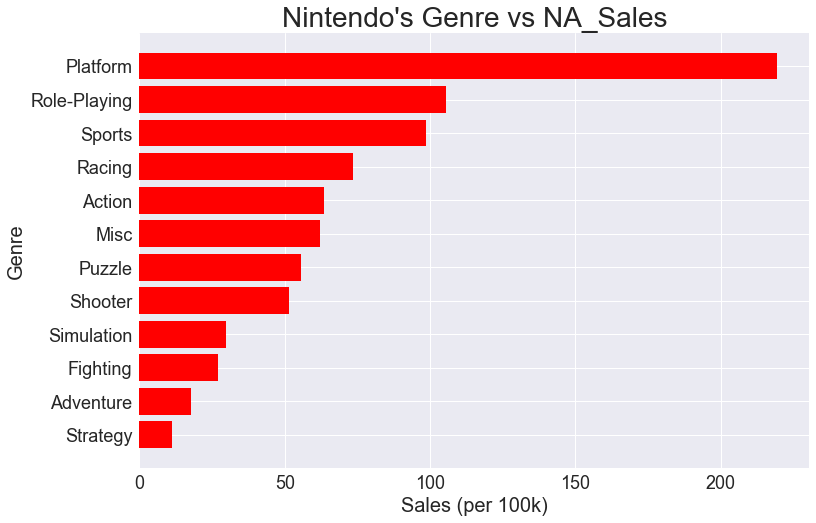

In [22]:
#Make the bar graph for NA_Sales

make_bar(nintendo,'NA_Sales','red')

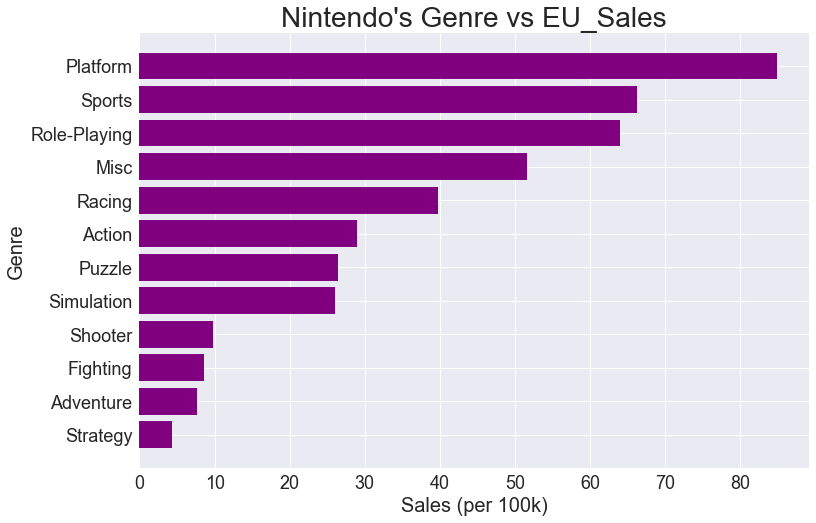

In [23]:
#EU_Sales
make_bar(nintendo,'EU_Sales','purple')

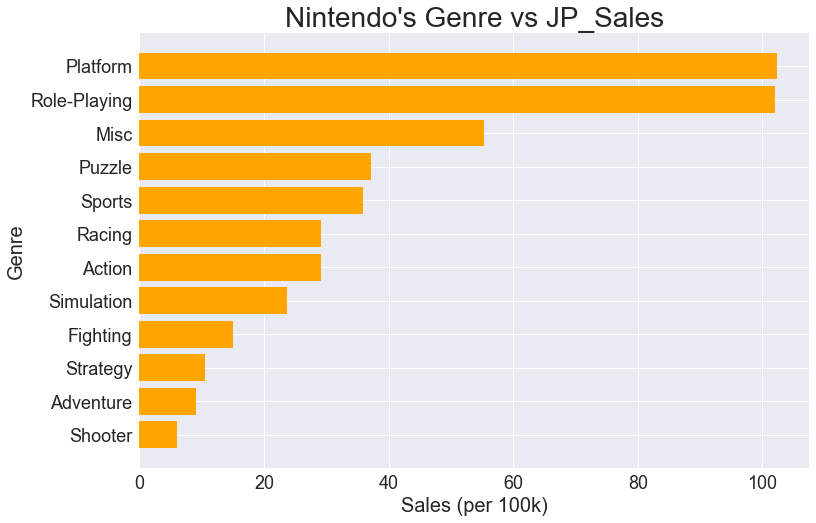

In [24]:
#JP_Sales
make_bar(nintendo,'JP_Sales','orange')

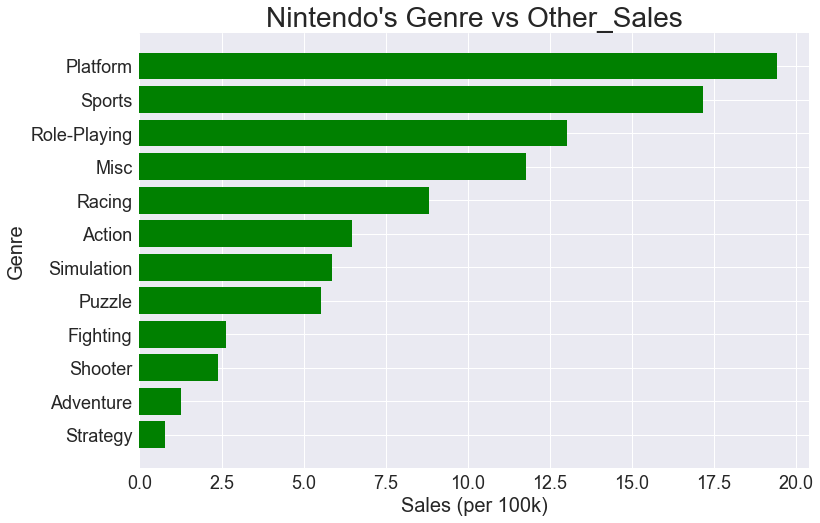

In [25]:
#Other_Sales
make_bar(nintendo,'Other_Sales',"green")

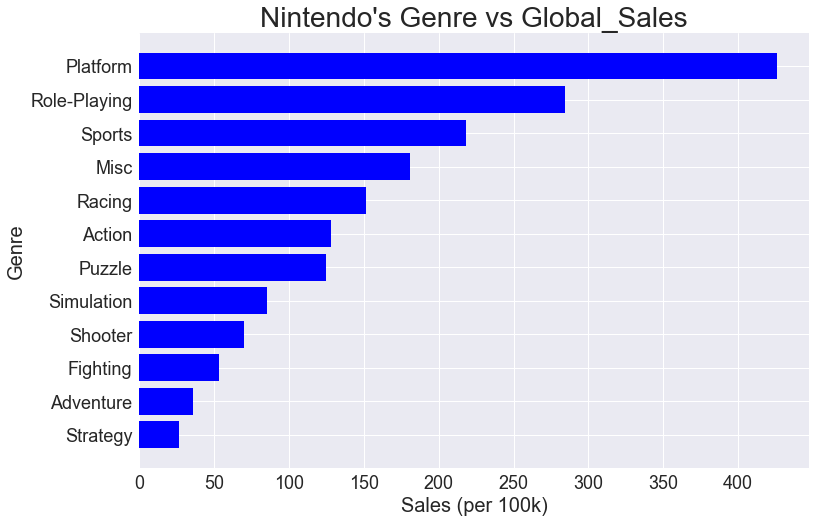

In [26]:
#Last but not least, Global Sales
make_bar(nintendo,'Global_Sales','blue')

The top 3 most popular Nintendo game genres are Platform, Role-Playing and Sports in everywhere but Japan. Looks like Japan doesn't like sports as much as the other regions.

At this point, I've come up with a hypothesis: there is a clear correlation between the genre of the game and its sales. 

To test my hypothesis, I run the dataframe.corr() method and pass it into seaborn's heatmap to visualize the correlation.

But first I have to give the Genre and Publisher a numeric label. I'll be using Panda's built-in get_dummies function.

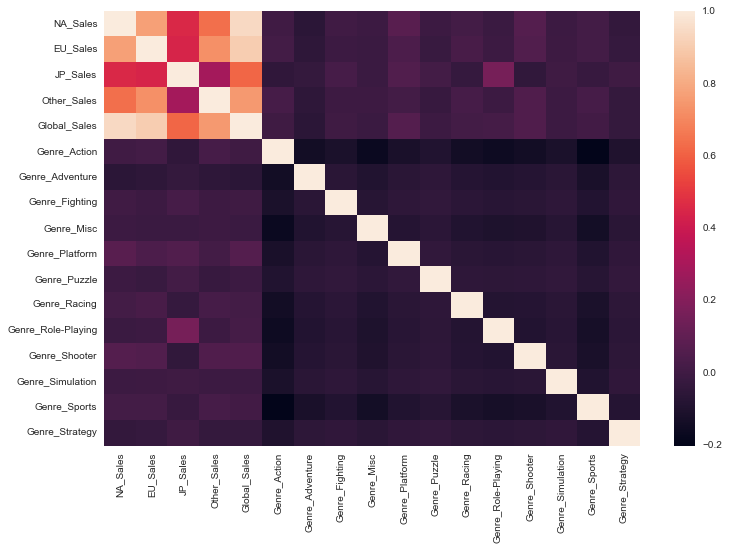

In [27]:
#Using pandas get_dummies

genre_data = df.join(pd.get_dummies(df[["Genre"]])).copy()
genre_data.drop(columns=['Rank','Year'],axis=1,inplace=True)

#Here I use seaborn library to see the correlation between game's genre and sales

plt.figure(figsize=(12,8))
sns.heatmap(genre_data.corr());

It seems that I was wrong, there is actually no correlation between the Genre and Sales.

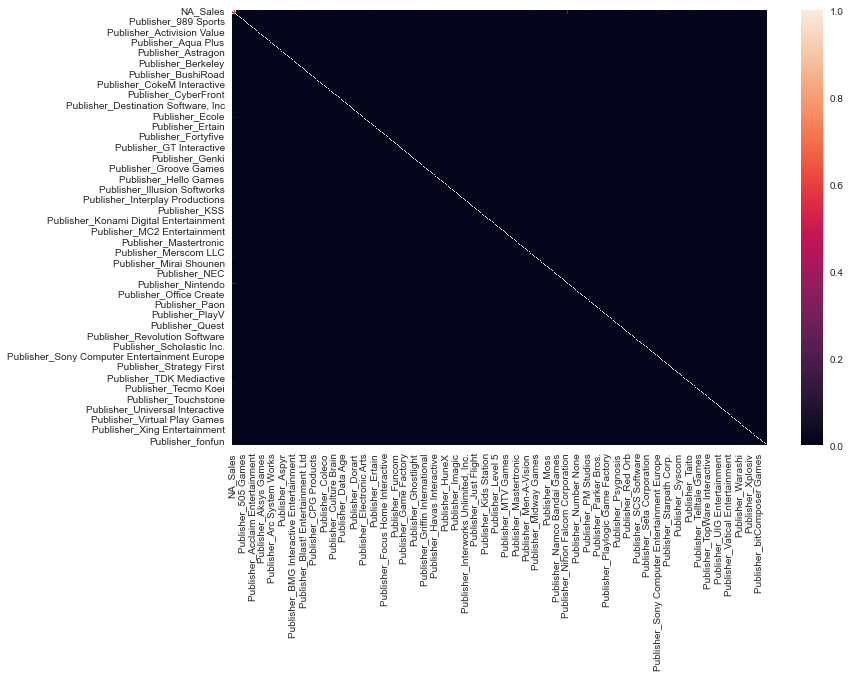

In [28]:
#Here I do the same to see if there's any correlation between the publishers and their sale numbers.

publisher_data = df.join(pd.get_dummies(df[["Publisher"]])).copy()

publisher_data.drop(columns=['Rank','Year'],axis=1,inplace=True)


plt.figure(figsize=(12,8))
sns.heatmap(publisher_data.corr(),vmin =0, vmax=1);

Seems that there is also no correlation between the Publisher and their sale numbers.

To further prove that there is no correlation between genre, publisher and sales, I'll use machine learning models.

## Linear Regression

Although the data doesn't really show any sign of linear correlation, it doesn't hurt to check.

In [33]:
genre_data.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0,...,0,0,0,0,0,0,0,0,1,0
1,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0,...,0,0,1,0,0,0,0,0,0,0
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0,...,0,0,0,0,0,0,0,0,1,0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,...,0,0,0,0,0,1,0,0,0,0


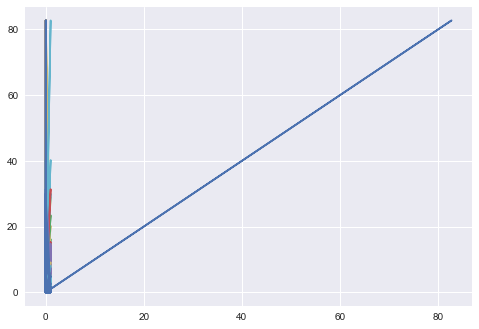

In [47]:
#Create the model

model = LinearRegression()

#Train the model

X = genre_data.drop(columns=['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre','Publisher'],axis=1)
y = genre_data['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

#Show the model

plt.plot(X_test,y_pred);


In the dataframe, the different genres all correlate with each other because the get_dummies() method returns an array (in this case a 2D array) of 0s and 1s. There will always be a 1-1 correlation when the genre is comparing itself to itself. This explains the line that diverges from the cluster of lines on the left side of the chart. I'll zoom in here:

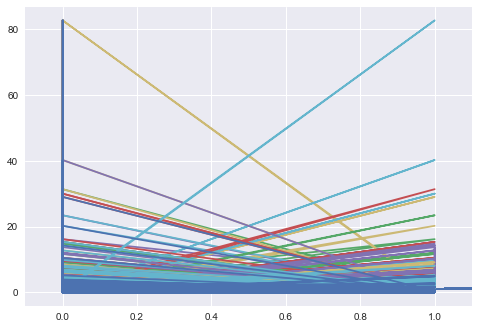

In [48]:
plt.xlim(-0.1,1.1)
plt.plot(X_test,y_pred);

This chart should be enough proof that there is no correlation between genre and sales. The model will also score itself with a perfect score just because of that one line that divergest from the cluster of lines.

In [49]:
#Model scoring itself

model.score(X_test,y_test)

1.0

I'll do the same with publishers to prove that there is also no linear correlation between publishers and sales.

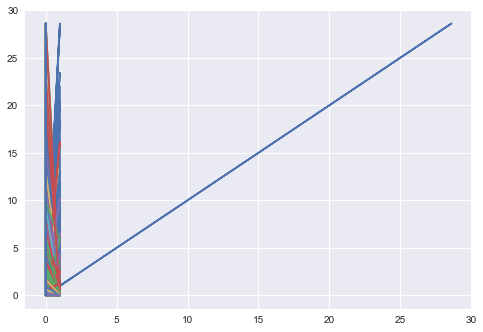

In [50]:
#Create the model

model = LinearRegression()

#Train the model

X = publisher_data.drop(columns=['Name','Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre','Publisher'],axis=1)
y = publisher_data['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

#Show the model

plt.plot(X_test,y_pred);


The difference between this chart and the last is just the sheer amount difference in independent variables. There are more publishers than genres.

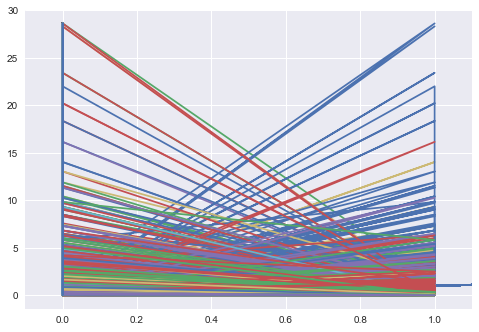

In [51]:
plt.xlim(-0.1,1.1)
plt.plot(X_test,y_pred);

## Conclusion

This dataset only provided two independent variables, both of which do not correlate with its dependent partners (sales). Makes sense because there are way more redeeming qualities about games that should be considered before buying them for which this dataset does not provide. If you are an aspiring video game designer, don't worry too much about the game's genre; there are other factors that heavily impact the sales of your games.